In [2]:
%pylab inline
import pandas as pd
import json
import datetime

Populating the interactive namespace from numpy and matplotlib


In [3]:
hitid = '161106'
date = "2019-07-26"
folder = 'Empirica Data - 2019-07-26 18-23-50'

In [5]:
data = pd.read_csv(folder+"/players.csv", parse_dates=['readyAt', 'createdAt', 'exitAt'])
data['Date'] = data['createdAt'].apply(lambda s: str(s).split(' ')[0])
data = data[data['Date']==date]

data.fillna(0, inplace=True)
data['urlParams'] = data['urlParams'].apply(lambda x: json.loads(x))
data['TurkID'] = data['urlParams'].apply(lambda x: x['workerId'] if 'workerId' in x.keys() else "")
data['HITID'] = data['urlParams'].apply(lambda x: x['hitId'] if 'hitId' in x.keys() else "")
data['BasePay'] = data['exitStatus'].apply(lambda s: 1 if s == "finished" else 0)
data.columns

Index(['_id', 'id', 'urlParams', 'bot', 'readyAt', 'timeoutStartedAt',
       'timeoutWaitCount', 'exitStepsDone', 'exitAt', 'exitStatus',
       'retiredAt', 'retiredReason', 'createdAt', 'data.index',
       'data.position', 'data.alterIDs', 'data.log', 'data.activity',
       'data.notebookOrder', 'data.notebooks', 'data.initialState',
       'data.score', 'data.active', 'data.caseMade', 'data.individualBonus',
       'data.teamBonus', 'data.totalPay', 'data.survey', 'Date', 'TurkID',
       'HITID', 'BasePay'],
      dtype='object')

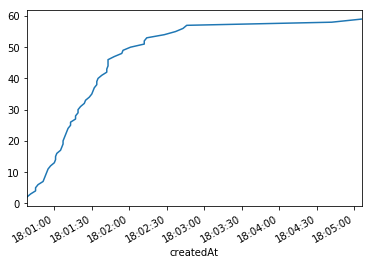

In [6]:
d2 = data.set_index('createdAt').sort_index()
d2['one'] = 1
d2['Players Joined'] = d2['one'].cumsum()
d2['Players Joined'].iloc[1:].plot();


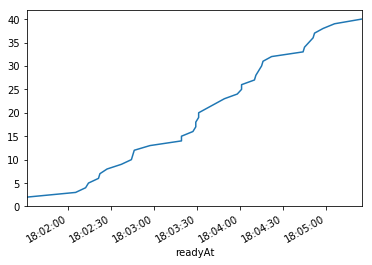

In [7]:
d3 = data[data['exitStatus'] != 'gameFull'].set_index('readyAt').sort_index()
d3['one'] = 1
d3['Players Ready'] = d3['one'].cumsum()
d3['Players Ready'].iloc[1:].plot()

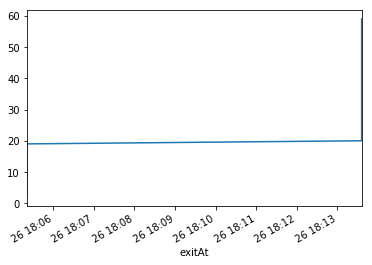

In [8]:
d4 = data.set_index('exitAt').sort_index()
d4['one'] = 1
d4['Players Finished'] = d4['one'].cumsum()
d4['Players Finished'].iloc[1:].plot()


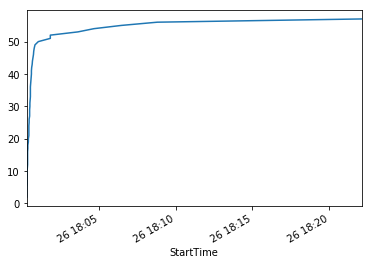

In [9]:
tp_df = pd.read_csv('DG Pilot matched pair Jul26.csv', parse_dates=['StartTime', 'CompletionTime'])
tp_df['StartTime'] = tp_df['StartTime'].apply(lambda t: t.tz_localize('UTC'))
d5 = tp_df.set_index('StartTime').sort_index()
d5['one'] = 1
d5['Players Entered'] = d5['one'].cumsum()
d5['Players Entered'].iloc[1:].plot()

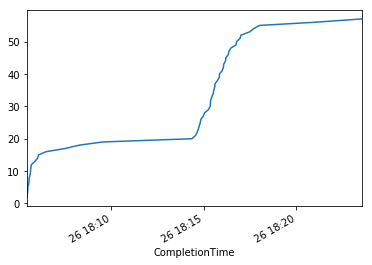

In [10]:
tp_df['CompletionTime'] = tp_df['CompletionTime'].apply(lambda t: t.tz_localize('UTC'))
d6 = tp_df.set_index('CompletionTime').sort_index()
d6['one'] = 1
d6['Players Left'] = d6['one'].cumsum()
d6['Players Left'].iloc[1:].plot()

In [20]:
mdf = pd.merge(d3[['Players Ready']], d2[['Players Joined']], left_index=True, right_index=True, how='outer')
mdf = pd.merge(mdf, d4[['Players Finished','exitStatus']], left_index=True, right_index=True, how='outer')
mdf = pd.merge(mdf, d5[['Players Entered']], left_index=True, right_index=True, how='outer')
mdf = pd.merge(mdf, d6[['Players Left']], left_index=True, right_index=True, how='outer')
mdf = mdf.sort_index().fillna(method='ffill').fillna(0)

mdf['Players Online'] = mdf['Players Entered'] - mdf['Players Left'] + 1
mdf['Players On Site'] = mdf['Players Joined'] - mdf['Players Finished']
mdf['Players Active'] = np.minimum(mdf['Players Ready'], mdf['Players On Site'])
mdf['Players Training'] = mdf['Players On Site'] - mdf['Players Active']
mdf['Players in Intro/Exit'] = np.maximum(mdf['Players Online'] - mdf['Players On Site'], 0)
mdf

,Players Ready,Players Joined,Players Finished,exitStatus,Players Entered,Players Left,Players Online,Players On Site,Players Active,Players Training,Players in Intro/Exit
2019-07-26 17:58:37+00:00,0.0,1.0,0.0,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2019-07-26 18:00:16+00:00,0.0,1.0,0.0,0,1.0,0.0,2.0,1.0,0.0,1.0,1.0
2019-07-26 18:00:17+00:00,0.0,1.0,0.0,0,2.0,0.0,3.0,1.0,0.0,1.0,2.0
2019-07-26 18:00:17+00:00,0.0,1.0,0.0,0,3.0,0.0,4.0,1.0,0.0,1.0,3.0
2019-07-26 18:00:17+00:00,0.0,1.0,0.0,0,4.0,0.0,5.0,1.0,0.0,1.0,4.0
2019-07-26 18:00:17+00:00,0.0,1.0,0.0,0,5.0,0.0,6.0,1.0,0.0,1.0,5.0
2019-07-26 18:00:18+00:00,0.0,1.0,0.0,0,6.0,0.0,7.0,1.0,0.0,1.0,6.0
2019-07-26 18:00:18+00:00,0.0,1.0,0.0,0,7.0,0.0,8.0,1.0,0.0,1.0,7.0
2019-07-26 18:00:18+00:00,0.0,1.0,0.0,0,8.0,0.0,9.0,1.0,0.0,1.0,8.0
2019-07-26 18:00:18+00:00,0.0,1.0,0.0,0,9.0,0.0,10.0,1.0,0.0,1.0,9.0


In [21]:
mdf.loc[mdf['Players in Intro/Exit'].idxmin()]

Players Ready            0
Players Joined           1
Players Finished         0
exitStatus               0
Players Entered          0
Players Left             0
Players Online           1
Players On Site          1
Players Active           0
Players Training         1
Players in Intro/Exit    0
Name: 2019-07-26 17:58:37+00:00, dtype: object

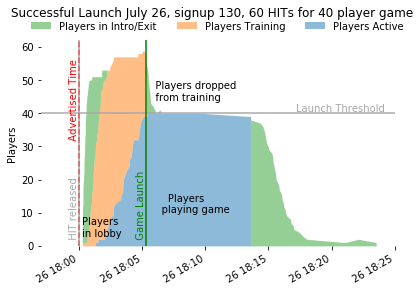

In [26]:
HIT_TS = pd.Timestamp('07/26/19 18:00')
Announced_TS = pd.Timestamp('07/26/19 18:00')

mdf[['Players Active', 'Players Training', 'Players in Intro/Exit']].iloc[2:].plot(kind='area', linewidth=0, alpha=.5, figsize=(6,4))
plt.box('off')
plt.xlim(pd.Timestamp('07/26/19 17:57',tz='UTC'), pd.Timestamp('07/26/19 18:25',tz='UTC'))

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='lower center', bbox_to_anchor=(.5,1), ncol=3, frameon=False)

plt.hlines(40, *plt.gca().get_xlim(), color='darkgrey')
plt.text(plt.gca().get_xlim()[1], 40, "Launch Threshold   ", color="darkgrey", ha='right', va='bottom')

start = mdf[mdf['exitStatus']!=0].index[0]
plt.vlines(start, *plt.gca().get_ylim(), color='g')
plt.text(start, 44, "   Players dropped\n   from training")
plt.text(start, 10, "       Players\n     playing game")
plt.text(start, 3, "Players         \nin lobby        ", ha='right')
plt.text(start, 0, "  Game Launch", rotation=90, color='g', va='bottom', ha='right')

plt.vlines(HIT_TS, *plt.gca().get_ylim(), color='darkgrey')
plt.text(HIT_TS, 0, "  HIT released", rotation=90, color='darkgrey', va='bottom', ha='right')

plt.vlines(Announced_TS, *plt.gca().get_ylim(), color='r', linestyle='--', alpha=.5)
plt.text(Announced_TS, 30, "  Advertised Time", rotation=90, color='r', va='bottom', ha='right')

tickpos, ticklabels = plt.xticks()



#plt.gca().set_xticklabels([s.get_text().split(' ')[-1] for s in ticklabels], rotation=0)




plt.suptitle("Successful Launch July 26, signup 130, 60 HITs for 40 player game", y=1)
plt.ylabel('Players')
plt.tight_layout()